In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'CS231N/assignments/assignment1/cs231n/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

'''
создается копия рабочих папок, распаковываюся данные - в все на диске colab
ВАЖНО СОХРАНИТЬ внесенные изменения в файлы .py  на google диск. Это ячейка в самом конце
'''
%cd /content/drive/My \Drive
%cp -r $FOLDERNAME ../../
%cd ../../
%cd cs231n/datasets/
!bash get_datasets.sh
%cd ../../


Mounted at /content/drive
/content/drive/My Drive
/content
/content/cs231n/datasets
--2022-02-11 08:03:01--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  46.8MB/s    in 3.6s    

2022-02-11 08:03:05 (44.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/content


# Implementing a Neural Network
В этом упражнении мы разработаем нейронную сеть с полностью связанными слоями для выполнения классификации и протестируем ее на наборе данных CIFAR-10.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Мы будем использовать класс `TwoLayerNet` в файле `cs231n/classifiers/neural_net.py` для представления экземпляров нашей сети. Сетевые параметры хранятся в переменной экземпляра `self.params`, где ключи — это имена строковых параметров, а значения — массивы numpy. Ниже мы инициализируем игрушечные данные и игрушечную модель, которые мы будем использовать для разработки вашей реализации.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Откройте файл `cs231n/classifiers/neural_net.py` и посмотрите на метод `TwoLayerNet.loss`. Эта функция очень похожа на функции потерь, которые вы написали для упражнений SVM и Softmax: она берет данные и веса и вычисляет оценки класса, потери и градиенты параметров. Реализуйте первую часть прямого прохода, которая использует веса и смещения для вычисления оценок для всех входных данных.

In [ ]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
В той же функции реализуйте вторую часть, которая вычисляет потери данных и регуляризации.

In [ ]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7963408538435033e-13


# Backward pass
Реализуйте остальную часть функции. Это позволит вычислить градиент потерь по отношению к переменным `W1, b1, W2 и b2.` Теперь, когда у вас (надеюсь!) правильно реализован прямой проход, вы можете отладить обратный проход, используя числовую проверку градиента:

In [ ]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11


# Train the network
Для обучения сети мы будем использовать стохастический градиентный спуск (SGD), аналогичный классификаторам SVM и Softmax. Посмотрите на функцию `TwoLayerNet.train` и заполните недостающие разделы, чтобы реализовать процедуру обучения. Это должно быть очень похоже на процедуру обучения, которую вы использовали для классификаторов SVM и Softmax. Вам также потребуется реализовать `TwoLayerNet.predict`, так как процесс обучения периодически выполняет прогнозирование, чтобы отслеживать точность во времени, пока сеть обучается.

После того, как вы реализовали метод, запустите приведенный ниже код, чтобы обучить двухслойную сеть на игрушечных данных. Вы должны добиться потерь при обучении менее 0.02.

Final training loss:  0.017149607938732093


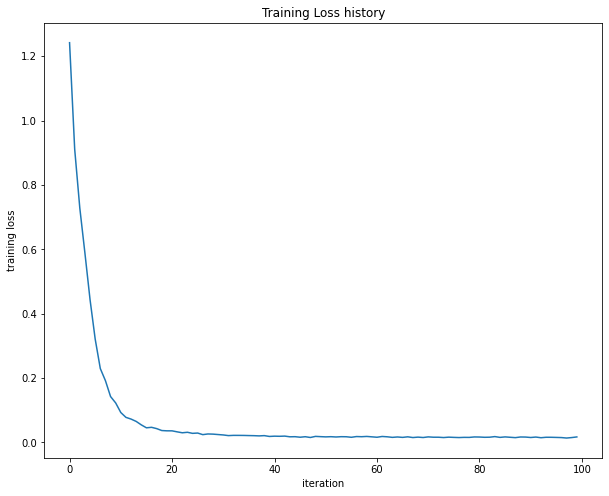

In [ ]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Теперь, когда вы реализовали двухслойную сеть, которая проходит проверки градиента и работает с игрушечными данными, пришло время загрузить наши любимые данные CIFAR-10, чтобы мы могли использовать их для обучения классификатора на реальном наборе данных.

In [4]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
Для обучения нашей сети мы будем использовать SGD. Кроме того, мы будем корректировать скорость обучения с экспоненциальным графиком скорости обучения по мере продолжения оптимизации; после каждой эпохи мы будем уменьшать скорость обучения, умножая ее на скорость затухания.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
С параметрами по умолчанию, которые мы предоставили выше, вы должны получить точность проверки около 0,29 в наборе проверки. это не очень хорошо

Одна из стратегий для понимания того, что не так, состоит в том, чтобы построить график функции потерь и точности на обучающих и проверочных наборах во время оптимизации.

Другая стратегия состоит в том, чтобы визуализировать веса, полученные на первом уровне сети. В большинстве нейронных сетей, обученных на визуальных данных, веса первого слоя обычно показывают некоторую видимую структуру при визуализации.

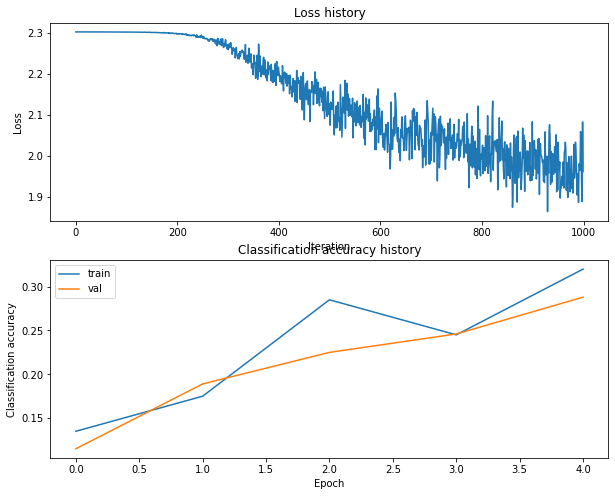

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

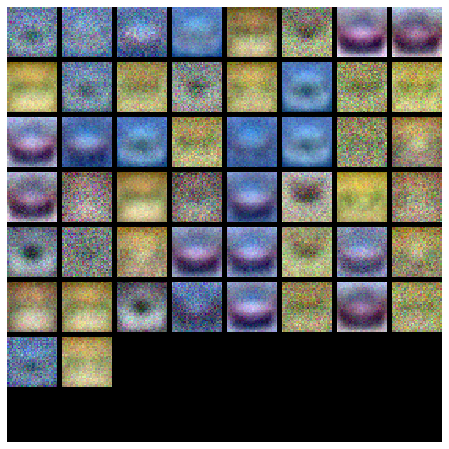

In [ ]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Глядя на визуализации выше, мы видим, что потери уменьшаются более или менее линейно, что, по-видимому, предполагает, что скорость обучения может быть слишком низкой. Более того, между точностью обучения и проверки нет разрыва, что говорит о том, что используемая нами модель имеет низкую пропускную способность (capacity) и что нам следует увеличить ее размер. С другой стороны, с очень большой моделью мы ожидаем увидеть больше переобучения, что проявит себя как очень большой разрыв между точностью обучения и проверки.

**Tuning**. Настройка гиперпараметров и понимание того, как они влияют на конечную эффективность — важная часть использования нейронных сетей, поэтому мы хотим, чтобы вы много практиковались. Ниже вы должны поэкспериментировать с различными значениями различных гиперпараметров, включая размер скрытого слоя, скорость обучения, количество эпох обучения и силу регуляризации. Вы также можете рассмотреть возможность настройки снижения скорости обучения, но вы должны иметь возможность получить хорошую эффективность, используя значение по умолчанию.

**Approximate results**. Вы должны стремиться к достижению точности классификации выше 48% на проверочном (validation) наборе. Наша лучшая сеть набрала более 52 % в проверочном наборе.

**Experiment**: Ваша цель в этом упражнении — получить как можно более хороший результат на CIFAR-10 (52% могут служить эталоном) с полносвязной нейронной сетью. Не стесняйтесь реализовывать свои собственные методы (например, `PCA` для уменьшения размерности, добавления `dropout` или добавления `features` в `решатель (solver)` и т. д.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$
Для  2-х слойной нейронной сети подбирались следующие гиперпараметры: скорость обучения, кол-во нейронов в скрытом слое, сила регуляризации.
Кроме того модель обучалась на входных данных с разным типом предобработки: центрированные, спроецированные на 300 главных компонент (PCA), PCA (300 компонент) +  whitening. 
В процессе обучение на начальном этапе приходилось анализировать изменение значений функции ошибки, чтобы отсеить значения гиперпараметров которые способствовали экстремально большим значениям функции ошибки или не обучали сеть вообще. Так, например, для обучения сети на данных PCA + whitening пришлось увеличить скорость обучения в некоторых случаях до 10, чтобы увеличить сходимость. Это связано с тем, что после whitening значения данных близки к 0 и к томуже начальная инициализация весов сети имеет достаточно низкую дисперсию (1e-4 * np.random.randn(input_size, hidden_size)). Наблюдалась большая дисперсия функции ошибки при обучении, скорее всего это следствие маленькой скорости обучения и малого количества экземпляров данных в батче.



In [41]:
#best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

def tuning_hyper_params(X_train, y_train, X_val, y_val, input_size, number_of_iters, num_classes = 10):
  best_val = -1
  best_net_history = None
  tuning_history ={}
  best_net = None
  '''
  Оценка эффективности модели при опредленных гиперпараметрах будет производиться 
  на заданном заранее наборе ( 1000 шт без кросс валидации)
  '''
  hidden_layers_sizes = [70,100,150,200]
  learning_rates = [1e-3, 1e-4,0.01]
  regularization_strengths = [1e-2,1e-3,0.1,0.25]
  '''
  # для whitening
  hidden_layers_sizes = [100,150, 200]
  learning_rates = [10,20,0.1]
  regularization_strengths = [0.25, 0.5, 2]
  '''
  grid = [(lsz,lr,rg) for lsz in hidden_layers_sizes for lr in learning_rates for rg in regularization_strengths ]
  print("Кол-во итераций по параметрам ", len(grid))
  i = 0
  j = 0
  for lsz,lr,rg in grid:
    i+=1
    if i % 10 == 0 :
      print("Выполняется %d/ %d итераций " % (i,len(grid)))
    net = TwoLayerNet(input_size,lsz,num_classes)
    result_train = net.train(X_train, y_train, X_val, y_val, lr, rg, num_iters = number_of_iters , batch_size = 200, verbose = False)
    val_acc_history = result_train["val_acc_history"]
    if(best_val < max(val_acc_history)):
      best_val = max(val_acc_history)
      best_net = net
      best_net_history = result_train
    
    tuning_history[(lsz,lr,rg)] = [result_train["train_acc_history"][np.argmax(val_acc_history)],max(val_acc_history)]

  # Данные подбора гиперпараметров
  for key, value in sorted(tuning_history.items(), key= lambda val_acc : np.asarray(val_acc)[1][1], reverse = True):
    train_accuracy, val_accuracy = tuning_history[key]
    print('lsz %d lr %e reg %e train accuracy: %f val accuracy: %f' % (
                key[0], key[1], key[2], value[0], value[1]))
  print('best validation accuracy achieved during cross-validation: %f' % best_val)

  # Визуализация
  plt.subplot(2, 1, 1)
  plt.plot(best_net_history['loss_history'])
  plt.title('Loss history')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')

  plt.subplot(2, 1, 2)
  plt.plot(best_net_history['train_acc_history'], label='train')
  plt.plot(best_net_history['val_acc_history'], label='val')
  plt.title('Classification accuracy history')
  plt.xlabel('Epoch')
  plt.ylabel('Classification accuracy')
  plt.grid(True)
  plt.legend()
  plt.show()

  return tuning_history, best_net, best_net_history

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Кол-во итераций по параметрам  48
Выполняется 10/ 48 итераций 
Выполняется 20/ 48 итераций 
Выполняется 30/ 48 итераций 
Выполняется 40/ 48 итераций 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


lsz 150 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.485000 val accuracy: 0.497000
lsz 100 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.475000 val accuracy: 0.490000
lsz 200 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.495000 val accuracy: 0.489000
lsz 70 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.545000 val accuracy: 0.488000
lsz 150 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.420000 val accuracy: 0.439000
lsz 200 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.410000 val accuracy: 0.437000
lsz 100 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.390000 val accuracy: 0.425000
lsz 70 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.475000 val accuracy: 0.421000
lsz 150 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.270000 val accuracy: 0.295000
lsz 200 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.310000 val accuracy: 0.291000
lsz 70 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.310000 val accuracy: 0.285000
lsz 100 lr 1.000000e-03 

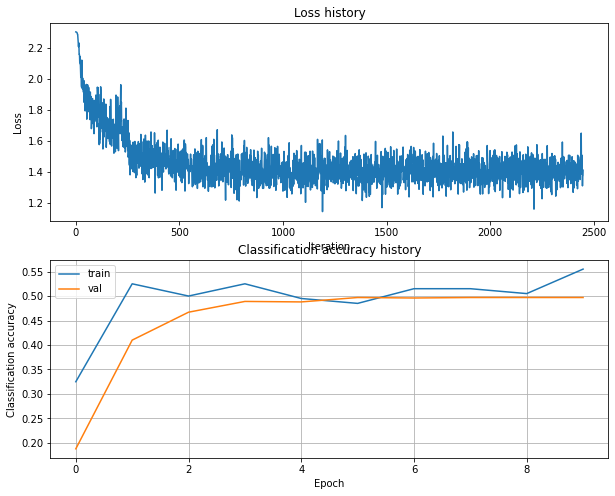

In [ ]:
tuning_history, best_net, best_net_history = tuning_hyper_params(X_train, y_train, X_val, y_val, X_train.shape[1], 2450, 10)

In [ ]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.497


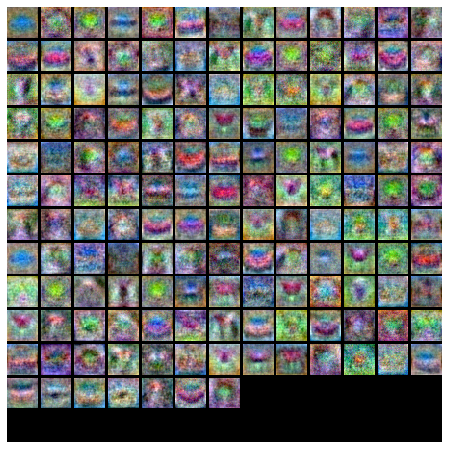

In [ ]:
# Visualize the weights of the best network
show_net_weights(best_net)

 ### Предобработка данных: **PCA** / **PCA + Whitening**

In [5]:
X_train_cov = np.dot(X_train.T,X_train)/(len(X_train)-1) # Вычисляем ковариационную матрицу. X_train уже центрирован. 
print(X_train_cov[0:5,0:5])

[[5381.63581672 5034.17223818 4937.77372692 5175.90647279 4836.63881043]
 [5034.17223818 5310.05283072 5439.68724172 4832.95438368 5105.48961196]
 [4937.77372692 5439.68724172 6466.6990483  4744.76941727 5242.98387306]
 [5175.90647279 4832.95438368 4744.76941727 5239.07734875 4887.58073015]
 [4836.63881043 5105.48961196 5242.98387306 4887.58073015 5163.55273601]]


In [6]:
## SVD разложение
U, S, V = np.linalg.svd(X_train_cov) # U - собственные вектора, S - собственные числа

(3072, 3072) (3072,) (3072, 3072)


Text(0, 0.5, 'sum % of variance')

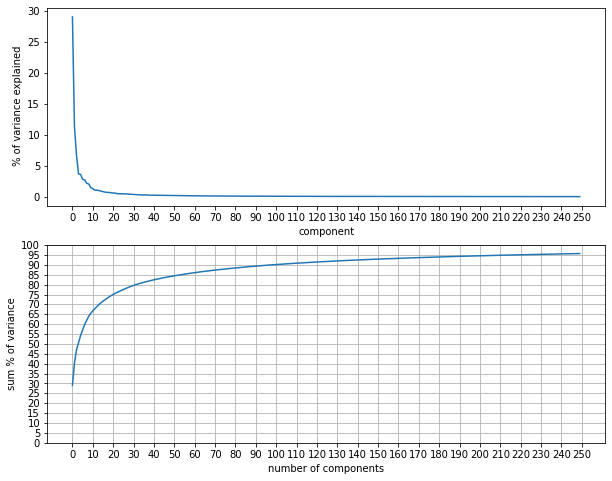

In [7]:
print(U.shape, S.shape, V.shape)

variance_explained_percent = S/np.sum(S)*100
cumulative_variance_explained = np.cumsum(variance_explained_percent) 
number_of_components = 250

fig, axes= plt.subplots(2,1)
axes[0].plot(np.arange(0,number_of_components), variance_explained_percent[0:number_of_components])
axes[0].set_xticks(np.arange(0,number_of_components+10,10))
axes[0].set_xlabel("component")
axes[0].set_ylabel(" % of variance explained")

axes[1].plot(np.arange(0,number_of_components), cumulative_variance_explained[0:number_of_components])
'''plt.xticks(range(0,100,5))'''
axes[1].set_ylim(0,100)
axes[1].grid(True)
axes[1].set_yticks(range(0,105,5))
axes[1].set_xticks(np.arange(0,number_of_components+10,10))
axes[1].set_xlabel("number of components")
axes[1].set_ylabel("sum % of variance")

In [8]:
# Проецирование данных на 300 компонент
X_train_pca = X_train.dot(U[::,0:300])
X_val_pca = X_val.dot(U[::,0:300])
X_test_pca = X_test.dot(U[::,0:300])
print(X_train_pca.shape,X_val_pca.shape,X_test_pca.shape)

(49000, 300) (1000, 300) (1000, 300)


Кол-во итераций по параметрам  48
Выполняется 10/ 48 итераций 
Выполняется 20/ 48 итераций 
Выполняется 30/ 48 итераций 
Выполняется 40/ 48 итераций 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


lsz 200 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.495000 val accuracy: 0.489000
lsz 150 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.485000 val accuracy: 0.486000
lsz 70 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.470000 val accuracy: 0.484000
lsz 100 lr 1.000000e-02 reg 2.500000e-01 train accuracy: 0.510000 val accuracy: 0.484000
lsz 200 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.400000 val accuracy: 0.443000
lsz 100 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.470000 val accuracy: 0.430000
lsz 70 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.460000 val accuracy: 0.428000
lsz 150 lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.460000 val accuracy: 0.427000
lsz 200 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.290000 val accuracy: 0.296000
lsz 150 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.340000 val accuracy: 0.289000
lsz 70 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.270000 val accuracy: 0.286000
lsz 100 lr 1.000000e-03 

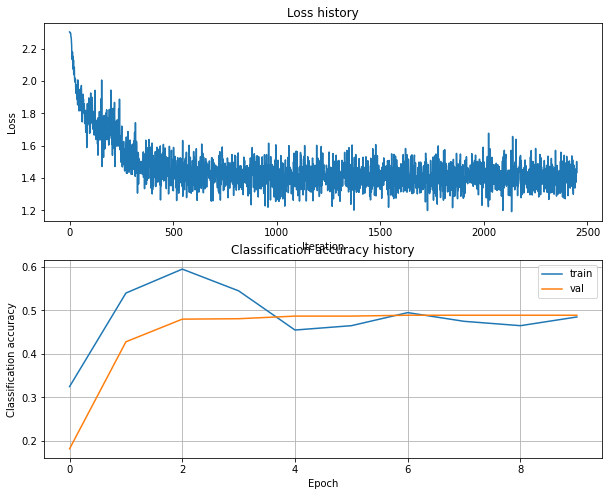

In [42]:
tuning_history_pca, best_net_pca, best_net_history_pca = tuning_hyper_params(X_train_pca, y_train, X_val_pca, y_val, X_train_pca.shape[1], 2450, 10)

In [43]:
# Print your validation accuracy: this should be above 48%
pca_val_acc = (best_net_pca.predict(X_val_pca) == y_val).mean()
print('Validation accuracy: ', pca_val_acc)

Validation accuracy:  0.489


#### **PCA + whitening**

In [9]:
X_train_whitening = X_train_pca/np.sqrt(S[0:300] + 1e-6) # нормируем проекцию (данных на собственные вектора) на sqrt(из собственнныч чисел) - ско
X_val_whitening = X_val_pca/np.sqrt( S[0:300] + 1e-6)
X_test_whitening = X_test_pca/np.sqrt(S[0:300] + 1e-6)
print(X_train_whitening.shape,X_val_whitening.shape,X_test_whitening.shape)

(49000, 300) (1000, 300) (1000, 300)


Кол-во итераций по параметрам  27


/content/cs231n/classifiers/neural_net.py:115: RuntimeWarning: overflow encountered in subtract
  scores -= max_line_scores
/content/cs231n/classifiers/neural_net.py:115: RuntimeWarning: invalid value encountered in subtract
  scores -= max_line_scores
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/cs231n/classifiers/neural_net.py:124: RuntimeWarning: overflow encountered in multiply
  reg_loss = reg*(np.sum(W1*W1)+np.sum(W2*W2))


Выполняется 10/ 27 итераций 
Выполняется 20/ 27 итераций 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


lsz 150 lr 1.000000e+01 reg 2.500000e-01 train accuracy: 0.625000 val accuracy: 0.501000
lsz 200 lr 1.000000e-01 reg 2.000000e+00 train accuracy: 0.870000 val accuracy: 0.493000
lsz 100 lr 1.000000e+01 reg 2.500000e-01 train accuracy: 0.600000 val accuracy: 0.491000
lsz 200 lr 1.000000e+01 reg 2.500000e-01 train accuracy: 0.735000 val accuracy: 0.485000
lsz 150 lr 1.000000e-01 reg 2.000000e+00 train accuracy: 0.860000 val accuracy: 0.481000
lsz 100 lr 1.000000e-01 reg 2.000000e+00 train accuracy: 0.755000 val accuracy: 0.456000
lsz 100 lr 1.000000e+01 reg 5.000000e-01 train accuracy: 0.650000 val accuracy: 0.427000
lsz 150 lr 1.000000e+01 reg 5.000000e-01 train accuracy: 0.680000 val accuracy: 0.419000
lsz 100 lr 2.000000e+01 reg 2.500000e-01 train accuracy: 0.510000 val accuracy: 0.417000
lsz 200 lr 1.000000e+01 reg 5.000000e-01 train accuracy: 0.780000 val accuracy: 0.411000
lsz 200 lr 2.000000e+01 reg 2.500000e-01 train accuracy: 0.550000 val accuracy: 0.395000
lsz 150 lr 2.000000e+

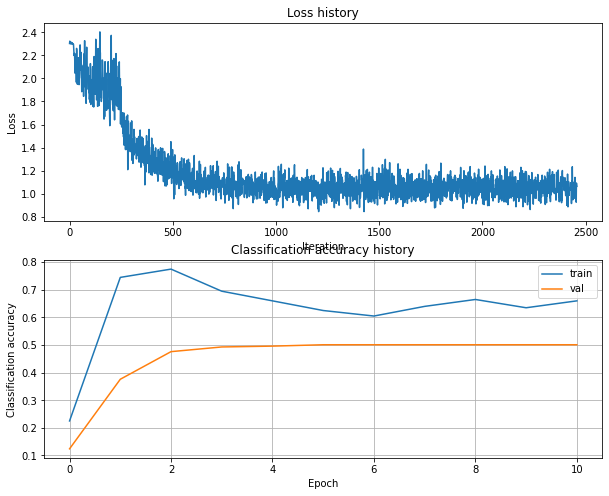

In [38]:
tuning_history_whitening, best_net_whitening, best_net_history_whitening = tuning_hyper_params(X_train_whitening, y_train, X_val_whitening, y_val, X_train_whitening.shape[1], 2450, 10)

# Run on the test set
Когда вы закончите экспериментировать, вы должны оценить свою окончательную обученную сеть на тестовом наборе; вы должны получить выше 48%.

In [ ]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.494


In [44]:
# Print your test accuracy: this should be above 48%
test_acc_pca = (best_net_pca.predict(X_test_pca) == y_test).mean()
print('Test accuracy (PCA): ', test_acc_pca)

Test accuracy (PCA):  0.482


In [40]:
# Print your test accuracy: this should be above 48%
test_acc_whitening = (best_net_whitening.predict(X_test_whitening) == y_test).mean()
print('Test accuracy (PCA): ', test_acc_whitening)

Test accuracy (PCA):  0.503


**accuracy:**
- 1) **centered data: val = 0.497, test = 0.494**; layers size = 150, lr = 0.001, reg =  0.25;
- 2) **PCA : val = 0.504, test = 0.482**; lsz = 100, lr = 0.0001, reg = 0.1;
- 3) **PCA + whitening: val = 0.501, test = 0.503**; layers size = 150, lr = 10 reg 0.25

**Inline Question**

Теперь, когда вы обучили классификатор нейронной сети, вы можете обнаружить, что точность вашего тестирования намного ниже, чем точность обучения. Каким образом мы можем уменьшить этот разрыв? Выбрать все, что подходит.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1, 3 (кстати не очень большой разрыв получился)

$\color{blue}{\textit Your Explanation:}$ 

1. Чем больше разнобразных данных, тем лучше. Важно чтобы данные содержали как можно больше встречающихся в их "природе" вариаций.

2.  Если точность на тренировочных данных  достаточно высока, а точность на тестовых (валидационных) сильно меньше, это значит что модель переобучилась. В данном случае увеличение количества нейронов (как и скрытых слоев) может только увеличить разрыв между тестовой и тренировочной точностью, так как модели в этом случае будет легче аппроксимировать все особенности данных а также и шум в них.
  Если же точность модели низкая как на тренировочном наборе так и на тестовом (валидационном) то это говорит о низкой пропускной способности сети ( недостаточной её сложности), не достаточной репрезентативной силе для описания сложных взаимосвязей в данных. В этом случае следует увеличтиь количество нейронов в скрытых слоях  и количество самих скрытых слоев. Контролировать переобучение следует силой регуляризации. Добавление скрытых слоев позволит увеличть множество параметризованных функций ( что улучшит аппроксимацию - эмпирика, хотя по теореме Цыбенко 2х-слойная сеть уже является универсальным аппроксиматором). Однако увеличение кол-ва скрытых слоев для полносвязной сети не так важно и эффективно как для сверточных нейронных сетей. К тому же нужно модифицировать саму сеть, чтобы решить множество проблем с обучением, например проблему затухания градиентов от слоя к слою.

3. Увеличение силы регуляризации способствует предотвращению переобучения: точной подгонки модели к обучащим данным и шуму в них (также аномальным выбросам), также способствует увеличению устойчивости обучения. Большой разрыв в точности на тренировочных данных и валидационных (тестовых) свидетельствует о переобучении.



---
# IMPORTANT

This is the end of this question. Please do the following:

1. Click `File -> Save` to make sure the latest checkpoint of this notebook is saved to your Drive.
2. Execute the cell below to download the modified `.py` files back to your drive.

In [34]:
import os

FOLDER_TO_SAVE = os.path.join('drive/My Drive/', FOLDERNAME)
FILES_TO_SAVE = ['cs231n/classifiers/neural_net.py']

for files in FILES_TO_SAVE:
  with open(os.path.join(FOLDER_TO_SAVE, '/'.join(files.split('/')[1:])), 'w') as f:
    f.write(''.join(open(files).readlines()))